In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Image
from pandas import get_dummies
from sklearn.model_selection import train_test_split
# Config the matlotlib backend as plotting inline in IPython
%matplotlib inline

In [0]:
from google.colab import files
uploaded = files.upload()


Saving iris.csv to iris.csv


In [0]:
data = pd.read_csv('iris.csv')

In [0]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [0]:
data.shape

(150, 5)

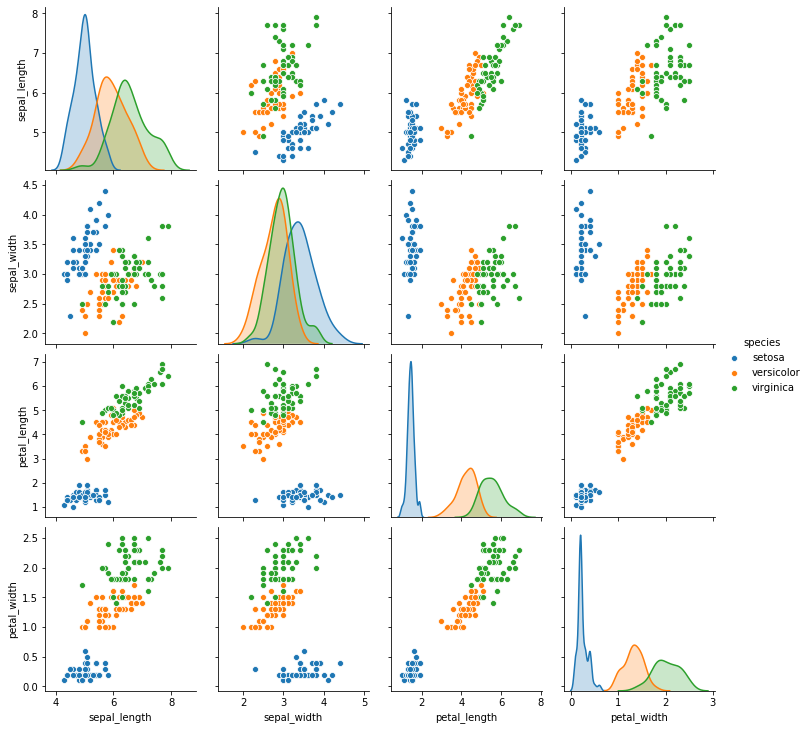

In [0]:
# Visualize data with Seaborn
g=sns.pairplot(data, hue="species", height = 2.5)

In [0]:
cols = data.columns
features = cols[0:4]
labels = cols[4]
print(features)
print(labels)


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')
species


In [0]:
data_norm = pd.DataFrame(data)

for feature in features:
    data[feature] = (data[feature] - data[feature].mean())/data[feature].std()

#Show that should now have zero mean
print("Averages")
print(data.mean())

print("\n Deviations")
#Show that we have equal variance
print(pow(data.std(),2))

Averages
sepal_length   -1.457168e-15
sepal_width    -1.722511e-15
petal_length   -2.043551e-15
petal_width    -9.843977e-17
dtype: float64

 Deviations
sepal_length    1.0
sepal_width     1.0
petal_length    1.0
petal_width     1.0
dtype: float64


In [0]:
#Shuffle The data
indices = data_norm.index.tolist()
indices = np.array(indices)
np.random.shuffle(indices)
X = data_norm.reindex(indices)[features]
y = data_norm.reindex(indices)[labels]
# One Hot Encode as a dataframe
y = get_dummies(y)

# Generate Training and Validation Sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3)

# Convert to np arrays so that we can use with TensorFlow
X_train = np.array(X_train).astype(np.float32)
X_test  = np.array(X_test).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
y_test  = np.array(y_test).astype(np.float32)

In [0]:
training_size = X_train.shape[1]
test_size = X_test.shape[1]
num_features = 4
num_labels = 3


num_hidden = 10 # experiment with more nodes and layers

graph = tf.Graph()
with graph.as_default():
    tf_train_set    = tf.constant(X_train)
    tf_train_labels = tf.constant(y_train)
    tf_valid_set    = tf.constant(X_test)
 
    
    print(tf_train_set)
    print(tf_train_labels)
    
    ## Note, since there is only 1 layer there are actually no hidden layers... but if there were
    ## there would be num_hidden
    weights_1 = tf.Variable(tf.truncated_normal([num_features, num_hidden]))
    weights_2 = tf.Variable(tf.truncated_normal([num_hidden, num_labels]))
    # weights_3 = tf.Variable(tf.truncated_normal([num_hidden, num_labels]))
    ## tf.zeros Automaticaly adjusts rows to input data batch size
    bias_1 = tf.Variable(tf.zeros([num_hidden]))
    bias_2 = tf.Variable(tf.zeros([num_labels]))
    
    
    logits_1 = tf.matmul(tf_train_set , weights_1 ) + bias_1
    rel_1 = tf.nn.tanh(logits_1)
    logits_2 = tf.matmul(rel_1, weights_2) + bias_2
    
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = tf_train_labels, logits=logits_2, ))
    optimizer = tf.train.GradientDescentOptimizer(.01).minimize(loss)
    
    ## Training prediction
    predict_train = tf.nn.softmax(logits=logits_2)
    
    
    
    # Validation prediction
    logits_1_val = tf.matmul(tf_valid_set, weights_1) + bias_1
    rel_1_val    = tf.nn.tanh(logits_1_val)
    logits_2_val = tf.matmul(rel_1_val, weights_2) + bias_2
    predict_valid = tf.nn.softmax(logits=logits_2_val)

Tensor("Const:0", shape=(105, 4), dtype=float32)
Tensor("Const_1:0", shape=(105, 3), dtype=float32)
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [0]:
def accuracy(predictions, labels):
  return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
          / predictions.shape[0])

num_steps = 2000
with tf.Session(graph = graph) as session:
    tf.initialize_all_variables().run()
    print(loss.eval())
    for step in range(num_steps):
        _,l, predictions = session.run([optimizer, loss, predict_train])
        
        if (step % 200 == 0):
              #print(predictions[3:6])
              print('Loss at step %d: %f' % (step, l))
              print('Training accuracy: %.1f%%' % accuracy( predictions, y_train[:, :]))
              print('Validation accuracy: %.1f%%' % accuracy(predict_valid.eval(), y_test))

Instructions for updating:
Use `tf.global_variables_initializer` instead.
2.3864384
Loss at step 0: 2.386438
Training accuracy: 17.1%
Validation accuracy: 22.2%
Loss at step 200: 0.618291
Training accuracy: 77.1%
Validation accuracy: 75.6%
Loss at step 400: 0.412288
Training accuracy: 82.9%
Validation accuracy: 80.0%
Loss at step 600: 0.326708
Training accuracy: 86.7%
Validation accuracy: 80.0%
Loss at step 800: 0.274709
Training accuracy: 91.4%
Validation accuracy: 86.7%
Loss at step 1000: 0.235891
Training accuracy: 92.4%
Validation accuracy: 84.4%
Loss at step 1200: 0.204137
Training accuracy: 94.3%
Validation accuracy: 86.7%
Loss at step 1400: 0.177368
Training accuracy: 95.2%
Validation accuracy: 91.1%
Loss at step 1600: 0.154635
Training accuracy: 95.2%
Validation accuracy: 91.1%
Loss at step 1800: 0.135360
Training accuracy: 95.2%
Validation accuracy: 91.1%
